In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/test-annotations-bbox.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data
# Выкинем лишнее в данном задании
data = data.drop(('ImageID'), axis = 1)
data = data.drop(('Source'), axis = 1)
data = data.drop(('Confidence'), axis = 1)

In [5]:
print(data)

         LabelName      XMin      XMax      YMin      YMax  IsOccluded  \
0         /m/07j7r  0.071875  0.145313  0.206250  0.391667           0   
1         /m/07j7r  0.439063  0.571875  0.264583  0.435417           0   
2         /m/07j7r  0.668750  1.000000  0.000000  0.552083           0   
3         /m/015p6  0.206208  0.849224  0.154639  1.000000           0   
4         /m/05s2s  0.137472  0.376940  0.000000  0.883652           1   
...            ...       ...       ...       ...       ...         ...   
937322    /m/04rky  0.903736  0.998563  0.347727  0.609091           1   
937323  /m/0cnyhnx  0.012931  0.227011  0.368182  0.602273           0   
937324  /m/0cnyhnx  0.512931  0.632184  0.465909  0.600000           0   
937325    /m/04yx4  0.047414  0.995690  0.293182  0.784091           0   
937326   /m/01g317  0.000000  1.000000  0.000000  1.000000           1   

        IsTruncated  IsGroupOf  IsDepiction  IsInside  
0                 1          1            0         0  

In [6]:
data.head()

,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,/m/07j7r,0.071875,0.145313,0.206250,0.391667,0,1,1,0,0
1,/m/07j7r,0.439063,0.571875,0.264583,0.435417,0,1,1,0,0
2,/m/07j7r,0.668750,1.000000,0.000000,0.552083,0,1,1,0,0
3,/m/015p6,0.206208,0.849224,0.154639,1.000000,0,0,0,0,0
4,/m/05s2s,0.137472,0.376940,0.000000,0.883652,1,1,0,0,0


In [7]:
data.tail()

,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
937322,/m/04rky,0.903736,0.998563,0.347727,0.609091,1,1,0,0,0
937323,/m/0cnyhnx,0.012931,0.227011,0.368182,0.602273,0,0,0,0,0
937324,/m/0cnyhnx,0.512931,0.632184,0.465909,0.600000,0,0,0,0,0
937325,/m/04yx4,0.047414,0.995690,0.293182,0.784091,0,0,1,1,0
937326,/m/01g317,0.000000,1.000000,0.000000,1.000000,1,0,1,0,0


In [8]:
print(data.shape)
print(data.columns)

(937327, 10)
Index(['LabelName', 'XMin', 'XMax', 'YMin', 'YMax', 'IsOccluded',
       'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object')


In [9]:
data.index

RangeIndex(start=0, stop=937327, step=1)

In [10]:
data.at[2, 'XMin']

0.66875

In [11]:
data['LabelName']

0           /m/07j7r
1           /m/07j7r
2           /m/07j7r
3           /m/015p6
4           /m/05s2s
             ...    
937322      /m/04rky
937323    /m/0cnyhnx
937324    /m/0cnyhnx
937325      /m/04yx4
937326     /m/01g317
Name: LabelName, Length: 937327, dtype: object

In [12]:
data['LabelName'][2]

'/m/07j7r'

In [13]:
data['LabelName'].dtype.name

'object'

In [14]:
type(data['LabelName'][2])

str

In [15]:
type(data['LabelName'])


pandas.core.series.Series

In [16]:
data[['LabelName', 'XMin']].head()


,LabelName,XMin
0,/m/07j7r,0.071875
1,/m/07j7r,0.439063
2,/m/07j7r,0.668750
3,/m/015p6,0.206208
4,/m/05s2s,0.137472


In [17]:
data.describe()

,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000,937327.000000
mean,0.360932,0.639071,0.324401,0.650945,0.445307,0.225889,0.086455,0.046983,0.007430
std,0.284059,0.284184,0.244283,0.272963,0.497000,0.418167,0.281036,0.211602,0.085875
min,0.000000,0.001563,0.000000,0.001563,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.098820,0.416667,0.117500,0.429603,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.330465,0.668998,0.294900,0.674058,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.582812,0.901903,0.498891,0.906874,1.000000,0.000000,0.000000,0.000000,0.000000
max,0.998525,1.000000,0.995575,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### уменьшим датасет, т.к. он слишком большой и все выполняется очень долго

In [18]:
data = data.iloc[1:3000, :]
data = data.copy()

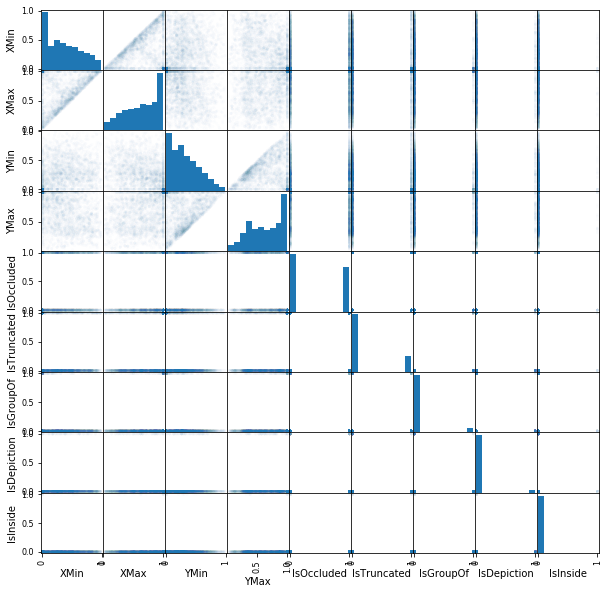

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [20]:
data.corr()

,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
XMin,1.000000,0.455648,0.153781,-0.316385,0.095788,-0.129927,-0.213164,0.017776,-0.035237
XMax,0.455648,1.000000,-0.249229,0.235218,-0.127258,0.158310,0.197567,-0.026483,0.024787
YMin,0.153781,-0.249229,1.000000,0.324304,0.029481,-0.112082,-0.161749,0.053358,-0.030436
YMax,-0.316385,0.235218,0.324304,1.000000,-0.138287,0.265697,0.118743,-0.008394,0.018670
IsOccluded,0.095788,-0.127258,0.029481,-0.138287,1.000000,-0.003667,-0.067593,-0.039547,-0.056521
IsTruncated,-0.129927,0.158310,-0.112082,0.265697,-0.003667,1.000000,0.038552,-0.071120,0.024213
IsGroupOf,-0.213164,0.197567,-0.161749,0.118743,-0.067593,0.038552,1.000000,0.002981,-0.024456
IsDepiction,0.017776,-0.026483,0.053358,-0.008394,-0.039547,-0.071120,0.002981,1.000000,-0.019726
IsInside,-0.035237,0.024787,-0.030436,0.018670,-0.056521,0.024213,-0.024456,-0.019726,1.000000


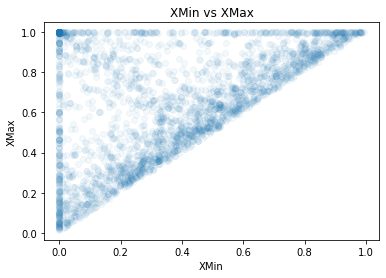

In [21]:
plt.plot(data['XMin'], data['XMax'], 'o', alpha = 0.05)
plt.xlabel('XMin')
plt.ylabel('XMax')
plt.title('XMin vs XMax')
pass

In [22]:
data['IsTruncated'] == 1

1        True
2        True
3       False
4        True
5        True
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: IsTruncated, Length: 2999, dtype: bool

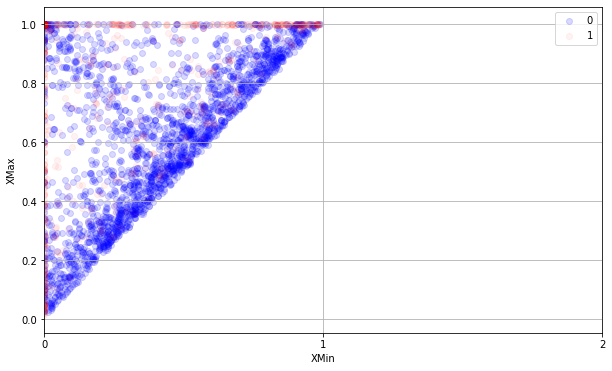

In [23]:

plt.figure(figsize = (10, 6))

plt.scatter(data[data['IsTruncated'] == 0]['XMin'],
            data[data['IsTruncated'] == 0]['XMax'],
            alpha = 0.15,
            label = '0',
            color = 'b')

plt.scatter(data[data['IsTruncated'] == 1]['XMin'],
            data[data['IsTruncated'] == 1]['XMax'],
            alpha = 0.05,
            label = '1',
            color = 'r')

plt.xlabel('XMin')
plt.xticks(range(4))
plt.xlim(0, 2)
plt.ylabel('XMax')
plt.legend()
plt.grid()

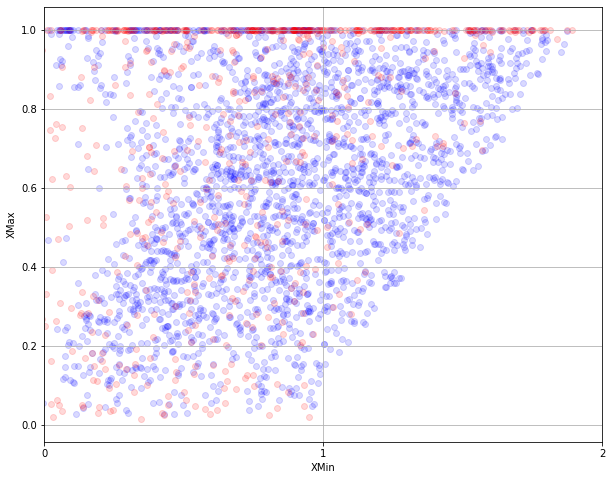

In [24]:
np.random.seed(0)
education_num_rnd = data['XMin'] + np.random.rand(data.shape[0]) - .05

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['IsTruncated'] == 0],
            data[data['IsTruncated'] == 0]['XMax'],
            alpha = 0.15,
            label = '0',
            color = 'b')

plt.scatter(education_num_rnd[data['IsTruncated'] == 1],
            data[data['IsTruncated'] == 1]['XMax'],
            alpha = 0.15,
            label = '1',
            color = 'r')

plt.xlabel('XMin')
plt.xticks(range(4))
plt.xlim(0, 2)
plt.ylabel('XMax')
plt.title('')
plt.grid()

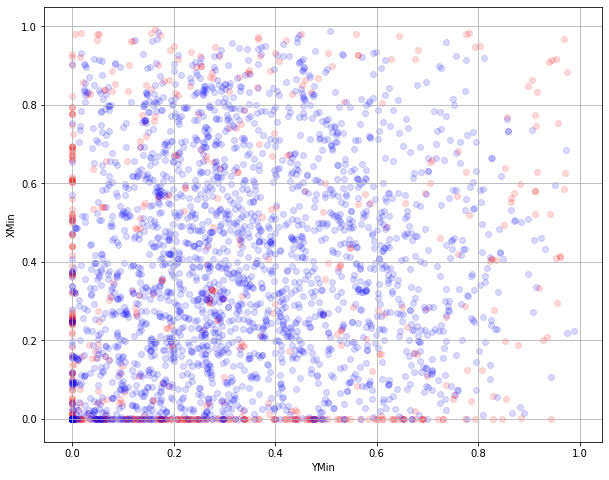

In [25]:

plt.figure(figsize = (10, 8))

plt.scatter(data[data['IsTruncated'] == 1]['YMin'],
            data[data['IsTruncated'] == 1]['XMin'],
            alpha = 0.15,
            label = '0',
            color = 'r')

plt.scatter(data[data['IsTruncated'] == 0]['YMin'],
            data[data['IsTruncated'] == 0]['XMin'],
            alpha = 0.15,
            label = '1',
            color = 'b')

plt.xlabel('YMin')
plt.ylabel('XMin')
plt.grid()

In [26]:
data.describe(include = ['object'])

,LabelName
count,2999
unique,200
top,/m/04rky
freq,215


In [27]:
data.describe(include = 'all')


,LabelName,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,2999,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
unique,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,/m/04rky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.369178,0.640253,0.317017,0.643593,0.437146,0.221407,0.069023,0.046015,0.008003
std,NaN,0.282655,0.279968,0.235213,0.271448,0.496116,0.415263,0.253536,0.209553,0.089114
min,NaN,0.000000,0.014749,0.000000,0.027083,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.115462,0.416471,0.132925,0.407080,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.332353,0.663717,0.280973,0.654867,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.586765,0.893750,0.477280,0.893750,1.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
data['YMax'].unique()


array([0.43541667, 0.5520833 , 1.        , ..., 0.57743365, 0.63716817,
       0.5619469 ])

In [29]:
data['IsTruncated'].unique()

array([1, 0], dtype=int64)

In [30]:
for name in data['YMax'].unique():
    print(name, data['IsTruncated'][data['YMax'] == name].iloc[0])

0.43541667 1
0.5520833 1
1.0 0
0.88365245 1
0.6902655 1
0.46238938 0
0.48893806 0
0.65707964 1
0.044247787000000004 1
0.42083332 0
0.41041666 0
0.3 0
0.29583332 0
0.34583333 0
0.31875 0
0.43958333 0
0.40833333 0
0.36458334 0
0.23541667 0
0.35 0
0.44166666 0
0.99791664 1
0.98541665 0
0.41666666 0
0.30208334 0
0.39375 0
0.80833334 0
0.69166666 0
0.62083334 0
0.68333334 0
0.8520833000000001 0
0.32310468 0
0.31949458 0
0.46209386 0
0.39711192 0
0.8333333 1
0.27083334 0
0.27291667 0
0.26875 0
0.28958333 0
0.32291666 1
0.35208333 1
0.43333334 0
0.26666668 0
0.29791668 0
0.38541666 0
0.94166666 0
0.4375 0
0.37916666 0
0.24791667 1
0.7916667 0
0.6458333 1
0.5243363 1
0.78539824 1
0.50663716 0
0.7323009 0
0.6526549 0
0.82522124 0
0.5287611 0
0.7234513000000001 1
0.9380530999999999 1
0.99557525 1
0.5199115 0
0.8185840999999999 0
0.8625277 0
0.99336284 0
0.6858407 1
0.80088496 1
0.39380529999999997 1
0.82743365 0
0.8716814 0
0.41592920000000005 0
0.42256638 0
0.90707964 0
0.42920354 0
0.95353985 

0.46119735 0
0.6141907 0
0.75831485 1
0.45676276 0
0.57427937 0
0.71875 0
0.76666665 0
0.7583333000000001 0
0.7604167 0
0.8783186 0
0.8738938 0
0.8761062 0
0.88274336 0
0.8141593 0
0.8296459999999999 0
0.8362832 0
0.86504424 0
0.86946905 0
0.6061947 0
0.5995575 0
0.71902657 0
0.49115044 0
0.4579646 0
0.86725664 0
0.5210643 0
0.67849225 1
0.83592016 0
0.9534368000000001 1
0.41241685 0
0.96230596 0
0.72727275 0
0.9600886999999999 0
0.83148557 0
0.9963964 1
0.5675676 0
0.5603604 0
0.9981982 1
0.34878588 0
0.87637967 0
0.5386313 0
0.86092716 0
0.8697572 0
0.8631346999999999 0
0.43929359999999995 0
0.42825606 0
0.47019866 0
0.47461369999999997 0
0.27152318 0
0.85871965 0
0.8719646999999999 0
0.8300221 0
0.5225225 0
0.542042 0
0.21321322 0
0.25525525 0
0.8573574 0
0.3753754 1
0.33483484 0
0.4069069 0
0.33783785 0
0.2807808 0
0.4084084 0
0.43693694 0
0.46096095 0
0.8588589 0
0.3843844 0
0.5495495 0
0.31681679999999995 0
0.34534535 0
0.8618619000000001 0
0.2822823 0
0.5435435000000001 0
0.3933

0.39791667 0
0.37280703 0
0.9985379999999999 0
0.99707603 1
0.40497077 0
0.4751462 0
0.47076023 0
0.73541665 0
0.53541666 0
0.78333336 1
0.6791666999999999 0
0.48337027 0
0.3924612 0
0.46784922 1
0.49667406 1
0.7937916 0
0.6474501 0
0.62971175 0
0.345898 0
0.4855876 0
0.49002218 0
0.63192904 0
0.7450111 0
0.62305987 0
0.42035398 0
0.9778761 1
0.25884956 0
0.43362832 0
0.9823009 0
0.44247788 0
0.565625 0
0.965625 0
0.5671875 0
0.6640625 0
0.2515625 0
0.8828125 0
0.4765625 0
0.9125 0
0.5046875 0
0.884375 0
0.4734375 0
0.9734375 0
0.766129 0
0.7203125 1
0.784375 1
0.475 1
0.2015625 1
0.6609375 1
0.8418803 0
0.7240000000000001 0
0.8440000000000001 0
0.898 0
0.88 0
0.884 0
0.8859999999999999 0
0.878 0
0.39799999999999996 0
0.272 0
0.29 0
0.888 0
0.894 0
0.825 0
0.225 0
0.9410775 0
0.8989898999999999 0
0.8922559000000001 0
0.23905724 0
0.22053872 0
0.21717171 0
0.93602693 0
0.9023568999999999 0
0.25084174 0
0.23737374 0
0.9814815 0
0.9595959999999999 0
0.9478114 0
0.9866666999999999 1
0.8556

In [31]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
#числовые в этом датасете == флоты, т.к. инты - бинарные
numerical_columns   = [c for c in data.columns if data[c].dtype.name == 'float64']
print(categorical_columns)
print(numerical_columns)

['LabelName']
['XMin', 'XMax', 'YMin', 'YMax']


In [32]:
for c in categorical_columns:
    print(c, data[c].unique())

LabelName ['/m/07j7r' '/m/015p6' '/m/05s2s' '/m/0k4j' '/m/07yv9' '/m/0dzct'
 '/m/03q69' '/m/0cgh4' '/m/05r655' '/m/01g317' '/m/09j2d' '/m/02p0tk3'
 '/m/04hgtk' '/m/0283dt1' '/m/0dzf4' '/m/03bt1vf' '/m/0k0pj' '/m/0c9ph5'
 '/m/018xm' '/m/04rky' '/m/09b5t' '/m/05zsy' '/m/0dv77' '/m/02xwb'
 '/m/03120' '/m/01_bhs' '/m/02y6n' '/m/0284d' '/m/01ww8y' '/m/0cxn2'
 '/m/0270h' '/m/083kb' '/m/0138tl' '/m/035r7c' '/m/0h8mhzd' '/m/0k65p'
 '/m/05y5lj' '/m/04yx4' '/m/01d40f' '/m/0463sg' '/m/01lcw4' '/m/07r04'
 '/m/0h9mv' '/m/08dz3q' '/m/0d4v4' '/m/083wq' '/m/015h_t' '/m/01prls'
 '/m/02wbm' '/m/0bt9lr' '/m/09kmb' '/m/03vt0' '/m/014sv8' '/m/0cyhj_'
 '/m/01h3n' '/m/0c_jw' '/m/04bcr3' '/m/09kx5' '/m/01r546' '/m/05z55'
 '/m/09j5n' '/m/01xq0k1' '/m/0cnyhnx' '/m/04_sv' '/m/0zvk5' '/m/052lwg6'
 '/m/0cdn1' '/m/07mhn' '/m/01xyhv' '/m/01mzpv' '/m/02wbtzl' '/m/02cvgx'
 '/m/0kpqd' '/m/01jfm_' '/m/0199g' '/m/01bl7v' '/m/0bjyj5' '/m/014j1m'
 '/m/05n4y' '/m/06c54' '/m/039xj_' '/m/019jd' '/m/014y4n' '/m/01xs3r'
 '/m/07

In [33]:
data[numerical_columns].count(axis = 0)

XMin    2999
XMax    2999
YMin    2999
YMax    2999
dtype: int64

In [34]:
data[categorical_columns].count(axis = 0)


LabelName    2999
dtype: int64

In [35]:
data.describe(include = [object])

,LabelName
count,2999
unique,200
top,/m/04rky
freq,215


In [36]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [37]:
data.describe(include = [object])

,LabelName
count,2999
unique,200
top,/m/04rky
freq,215


### Векторизация

In [38]:
# В интах лежат бинарные признаки
binary_columns = [c for c in data.columns if data[c].dtype.name == 'int64']
# Лейблы
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['IsOccluded', 'IsTruncated', 'IsGroupOf', 'IsDepiction', 'IsInside'] ['LabelName']


In [39]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)


Index(['LabelName_/m/01226z', 'LabelName_/m/0138tl', 'LabelName_/m/014j1m',
       'LabelName_/m/014sv8', 'LabelName_/m/014trl', 'LabelName_/m/014y4n',
       'LabelName_/m/01599', 'LabelName_/m/015h_t', 'LabelName_/m/015p6',
       'LabelName_/m/015x4r',
       ...
       'LabelName_/m/0jyfg', 'LabelName_/m/0k0pj', 'LabelName_/m/0k1tl',
       'LabelName_/m/0k4j', 'LabelName_/m/0k5j', 'LabelName_/m/0k65p',
       'LabelName_/m/0kpqd', 'LabelName_/m/0n28_', 'LabelName_/m/0qmmr',
       'LabelName_/m/0zvk5'],
      dtype='object', length=200)


### Нормализация

In [40]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,XMin,XMax,YMin,YMax
count,2999.000000,2999.000000,2999.000000,2999.000000
mean,0.369178,0.640253,0.317017,0.643593
std,0.282655,0.279968,0.235213,0.271448
min,0.000000,0.014749,0.000000,0.027083
25%,0.115462,0.416471,0.132925,0.407080
50%,0.332353,0.663717,0.280973,0.654867
75%,0.586765,0.893750,0.477280,0.893750
max,0.992188,1.000000,0.988201,1.000000


In [41]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)


In [42]:
data_numerical.describe()


,XMin,XMax,YMin,YMax
count,2.999000e+03,2.999000e+03,2.999000e+03,2.999000e+03
mean,-2.949736e-16,3.591807e-15,-1.585039e-15,-8.027072e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.306108e+00,-2.234197e+00,-1.347787e+00,-2.271194e+00
25%,-8.976167e-01,-7.993128e-01,-7.826602e-01,-8.713052e-01
50%,-1.302833e-01,8.380845e-02,-1.532377e-01,4.153279e-02
75%,7.697949e-01,9.054493e-01,6.813546e-01,9.215658e-01
max,2.204132e+00,1.284957e+00,2.853514e+00,1.312986e+00


### Соединяем

In [43]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)

print(data.shape)
print(data.columns)

(2999, 209)
Index(['XMin', 'XMax', 'YMin', 'YMax', 'LabelName_/m/01226z',
       'LabelName_/m/0138tl', 'LabelName_/m/014j1m', 'LabelName_/m/014sv8',
       'LabelName_/m/014trl', 'LabelName_/m/014y4n',
       ...
       'LabelName_/m/0k65p', 'LabelName_/m/0kpqd', 'LabelName_/m/0n28_',
       'LabelName_/m/0qmmr', 'LabelName_/m/0zvk5', 'IsOccluded', 'IsTruncated',
       'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object', length=209)


In [44]:
data.describe()

,XMin,XMax,YMin,YMax,LabelName_/m/01226z,LabelName_/m/0138tl,LabelName_/m/014j1m,LabelName_/m/014sv8,LabelName_/m/014trl,LabelName_/m/014y4n,...,LabelName_/m/0k65p,LabelName_/m/0kpqd,LabelName_/m/0n28_,LabelName_/m/0qmmr,LabelName_/m/0zvk5,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
count,2.999000e+03,2.999000e+03,2.999000e+03,2.999000e+03,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,-2.949736e-16,3.591807e-15,-1.585039e-15,-8.027072e-15,0.000333,0.002668,0.000333,0.016005,0.000667,0.001000,...,0.017339,0.000333,0.000333,0.000333,0.001000,0.437146,0.221407,0.069023,0.046015,0.008003
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.018260,0.051588,0.018260,0.125517,0.025820,0.031617,...,0.130553,0.018260,0.018260,0.018260,0.031617,0.496116,0.415263,0.253536,0.209553,0.089114
min,-1.306108e+00,-2.234197e+00,-1.347787e+00,-2.271194e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.976167e-01,-7.993128e-01,-7.826602e-01,-8.713052e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.302833e-01,8.380845e-02,-1.532377e-01,4.153279e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.697949e-01,9.054493e-01,6.813546e-01,9.215658e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.204132e+00,1.284957e+00,2.853514e+00,1.312986e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X = data.drop(('IsTruncated'), axis = 1)
y = data['IsTruncated']
feature_names = X.columns

In [46]:
type(feature_names)


pandas.core.indexes.base.Index

In [47]:
feature_names


Index(['XMin', 'XMax', 'YMin', 'YMax', 'LabelName_/m/01226z',
       'LabelName_/m/0138tl', 'LabelName_/m/014j1m', 'LabelName_/m/014sv8',
       'LabelName_/m/014trl', 'LabelName_/m/014y4n',
       ...
       'LabelName_/m/0k5j', 'LabelName_/m/0k65p', 'LabelName_/m/0kpqd',
       'LabelName_/m/0n28_', 'LabelName_/m/0qmmr', 'LabelName_/m/0zvk5',
       'IsOccluded', 'IsGroupOf', 'IsDepiction', 'IsInside'],
      dtype='object', length=208)

In [48]:
print(X.shape)
print(y.shape)
N, d = X.shape

(2999, 208)
(2999,)


In [49]:
type(X)

pandas.core.frame.DataFrame

In [50]:
type(y)

pandas.core.series.Series

### kNN

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2099 900


In [52]:
2099+900

2999

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [54]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [55]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.1529299666507861 0.16666666666666666


In [56]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[678  13]
 [137  72]]


In [57]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

### SVC

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

c:\users\nessi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.21676989042401143 0.23222222222222222


### Random Forest

In [59]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0019056693663649356 0.09111111111111111


In [60]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [61]:
np.sum(rf.feature_importances_)


0.9999999999999999

In [62]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature ' YMax' (0.225578)
 2. feature ' XMax' (0.199051)
 3. feature ' XMin' (0.189215)
 4. feature ' YMin' (0.148781)
 5. feature 'IsOccluded' (0.019597)
 6. feature 'IsGroupOf' (0.018411)
 7. feature 'LabelName_/m/02p0tk3' (0.007292)
 8. feature 'LabelName_/m/09j2d' (0.007217)
 9. feature 'LabelName_/m/0k4j' (0.006903)
10. feature 'LabelName_/m/04rky' (0.006777)
11. feature 'LabelName_/m/07j7r' (0.006507)
12. feature 'LabelName_/m/03bt1vf' (0.006448)
13. feature 'LabelName_/m/01g317' (0.006084)
14. feature 'LabelName_/m/04yx4' (0.005399)
15. feature 'LabelName_/m/0cgh4' (0.005213)
16. feature 'LabelName_/m/01ww8y' (0.005131)
17. feature 'LabelName_/m/0270h' (0.005050)
18. feature 'LabelName_/m/035r7c' (0.004983)
19. feature 'IsDepiction' (0.004907)
20. feature 'LabelName_/m/05r655' (0.004873)
21. feature 'LabelName_/m/03q69' (0.004425)
22. feature 'LabelName_/m/083wq' (0.004243)
23. feature 'LabelName_/m/0dzf4' (0.003950)
24. feature 'LabelName_/m/0c9ph5' (0.003

In [63]:
feature_names[[1,0,1]]

Index(['XMax', 'XMin', 'XMax'], dtype='object')

(-1, 20)

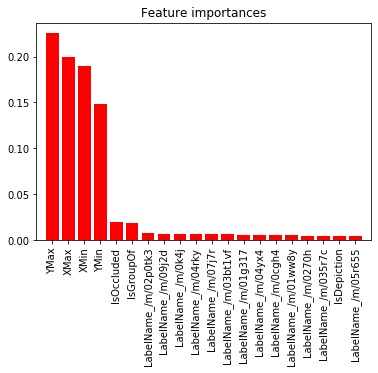

In [64]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

### Extremely Randomized Trees

In [65]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0019056693663649356 0.13333333333333333


### AdaBoost

In [66]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.07908527870414483 0.15777777777777777


### GBT

In [67]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.006193425440686041 0.11
